In [1]:
import cv2
image = cv2.imread("C:/Users/DINESH/Desktop/depp learning/training/tiger/1.jpg")
cv2.imshow ("output", image)
cv2.waitKey(0)

-1

In [2]:
import cv2
import numpy as np
image = cv2.imread("C:/Users/DINESH/Desktop/depp learning/training/tiger/1.jpg")
blurred_image = cv2.medianBlur (image,5)
output = np.hstack((image, blurred_image))
cv2.imshow("Original vs Blurred",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
import cv2
import numpy as np
image1 = cv2.imread("C:/Users/DINESH/Desktop/depp learning/training/tiger/1.jpg")
img= cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,120,255,cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,120,255,cv2.THRESH_TOZERO_INV)
cv2.imshow('Binary Threshold',thresh1)
cv2.imshow('Binary Threshold Inverted',thresh2)
cv2.imshow('Truncated Threshold',thresh3)
cv2.imshow('Set to 0',thresh4)
cv2.imshow('Set to 0 Inverted',thresh5)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


Text(0.5, 1.0, 'histogram of gray values')

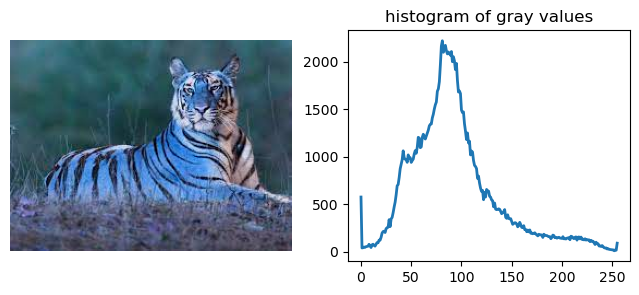

In [4]:
from skimage.exposure import histogram
import matplotlib.pyplot as plt
hist, hist_centers = histogram(image1)
fig, axes = plt. subplots (1,2, figsize = (8,3))
axes[0].imshow(image1 , cmap = plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')


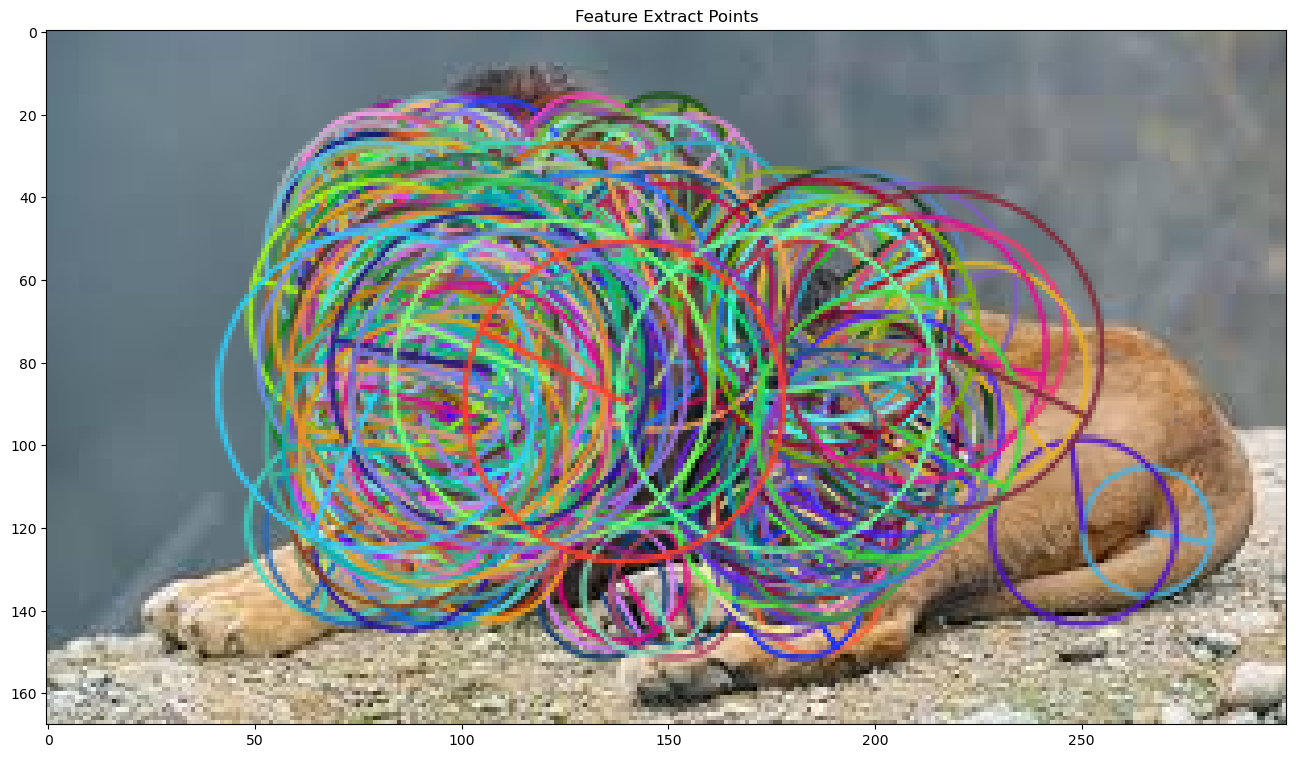

In [5]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
image3 = cv2.imread(os.path.join("C:/Users/DINESH/Desktop/depp learning/training/lion/11.jpg"))
image3 = cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)
orb = cv2.ORB_create()
key_points, description = orb.detectAndCompute(image3,None)
img_building_keypoints = cv2.drawKeypoints(image3,key_points, image3,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(16,16))
plt.title('Feature Extract Points')
plt.imshow(img_building_keypoints)
plt.show()
                    

In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [7]:
lion_dir = "C:/Users/DINESH/Desktop/depp learning/training/lion"
tiger_dir = "C:/Users/DINESH/Desktop/depp learning/training/tiger"

In [8]:
image_width, image_height = 224,224

In [9]:
lion_images = []
for filename in os.listdir(lion_dir):
    img = cv2.imread(os.path.join(lion_dir,filename))
    img = cv2.resize(img,(image_width,image_height))
    img = img.astype('float32')/255.0
    lion_images.append(img)
lion_images = np.array(lion_images)

In [10]:
tiger_images = []
for filename in os.listdir(tiger_dir):
    img = cv2.imread(os.path.join(tiger_dir, filename))
    img = cv2.resize(img,(image_width, image_height))
    img = img.astype('float32')/255.0
    tiger_images.append(img)
tiger_images = np.array(tiger_images)
    

In [11]:
lion_lables = np.ones(len(lion_images))
tiger_lables = np.zeros(len(tiger_images))

In [12]:
data=np.concatenate((lion_images,tiger_images),axis=0)
labels = np.concatenate((lion_lables,tiger_lables),axis=0)

In [13]:
indices = np.random.permutation(len(data))
data = data[indices]
labels = labels[indices]

In [14]:
train_split = 0.8
split_idx = int(train_split * len(data))


In [15]:
train_data = data[:split_idx]
train_labels=labels[:split_idx]
test_data = data[split_idx:]
test_labels = labels[split_idx:]



In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation ='relu',input_shape=(image_width,image_height,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics =['accuracy'])

In [ ]:
model.fit(train_data,train_labels,epochs =20,batch_size = 32)

Epoch 1/20
5/5 [==============================] - 15s 3s/step - loss: 1.2550 - accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 13s 3s/step - loss: 0.6251 - accuracy: 0.6687
Epoch 3/20
5/5 [==============================] - 13s 2s/step - loss: 0.4793 - accuracy: 0.7375
Epoch 4/20
5/5 [==============================] - 13s 3s/step - loss: 0.3191 - accuracy: 0.9000
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 0.2503 - accuracy: 0.9062
Epoch 6/20
5/5 [==============================] - 13s 3s/step - loss: 0.2169 - accuracy: 0.9000
Epoch 7/20
5/5 [==============================] - 13s 3s/step - loss: 0.2536 - accuracy: 0.9000
Epoch 8/20
5/5 [==============================] - 13s 3s/step - loss: 0.1354 - accuracy: 0.9688
Epoch 9/20
5/5 [==============================] - 14s 3s/step - loss: 0.1112 - accuracy: 0.9500
Epoch 10/20
5/5 [==============================] - 13s 3s/step - loss: 0.0560 - accuracy: 0.9937
Epoch 11/20
5/5 [======================

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test loss: {loss}")
print(f"Test accurcy : {accuracy}")


In [ ]:
new_image_path = "C:/Users/DINESH/Desktop/depp learning/testing/tiger/43.jpg"
new_image = cv2.imread(new_image_path)
new_image = cv2.resize(new_image, (image_width, image_height))
new_image = new_image.astype('float32')/255.0
new_image = np.expand_dims(new_image,axis=0)


In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test loss: {loss}")
print(f"Test accurcy : {accuracy}")


In [ ]:
prediction = model.predict(new_image)
is_lion = prediction[0][0]>0.5

In [ ]:
if is_lion:
    print("The given image is a Lion.")
else:
    print("The given image is not a Lion.")